In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from lime import lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
url = r"C:\Users\Admin\Downloads\column_2C_weka.csv"
columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
           'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
df = pd.read_csv(url, sep=",", header=None, names=columns)

In [38]:
# Mã hóa nhãn
df['class'] = df['class'].map({'Normal': 0, 'Abnormal': 1})

In [39]:
# Tách X và y, chuẩn hóa đặc trưng

# Tách đặc trưng và nhãn
X = df.drop("class", axis=1)
y = df["class"]

# Kết hợp lại X và y để loại bỏ đồng bộ
data = pd.concat([X, y], axis=1)

# Loại bỏ các dòng có NaN trong cột 'class' (y)
data = data.dropna(subset=['class'])

# Tách lại X và y
X = data.drop("class", axis=1)
y = data["class"]

# Nếu cần, bạn có thể chuyển các cột khác về float tương tự
# hoặc chuyển toàn bộ DataFrame cùng lúc:
X = X.apply(pd.to_numeric, errors='coerce')

# Xử lý giá trị thiếu nếu có (ví dụ bằng trung bình)
X.fillna(X.mean(), inplace=True)

# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
# Cân bằng lớp bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [41]:
# Tách train/test (90/10)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42, stratify=y_resampled)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier


🔎 Evaluating models...

KNN                  | Accuracy: 0.93 | AUC: 0.97
Logistic Regression  | Accuracy: 0.86 | AUC: 0.92
Naive Bayes          | Accuracy: 0.88 | AUC: 0.95
Decision Tree        | Accuracy: 0.83 | AUC: 0.83
SVM                  | Accuracy: 0.88 | AUC: 0.93
Random Forest        | Accuracy: 0.90 | AUC: 0.96
Extra Trees          | Accuracy: 0.90 | AUC: 0.99


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


XGBoost              | Accuracy: 0.90 | AUC: 0.95
[LightGBM] [Info] Number of positive: 189, number of negative: 189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_11916\3082747493.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df, x="Accuracy", y="Model", palette="viridis")


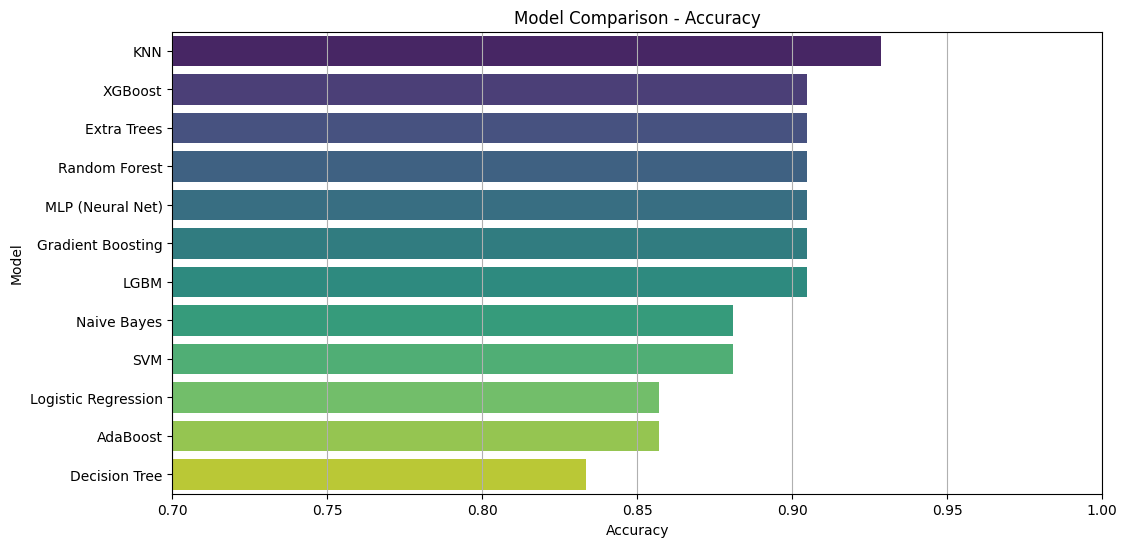


📌 Best model by accuracy:
Model            KNN
Accuracy    0.928571
AUC         0.968254
Name: 0, dtype: object


In [43]:
# Danh sách mô hình cần đánh giá
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LGBM": LGBMClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "MLP (Neural Net)": MLPClassifier(max_iter=1000),
}

# Khởi tạo bảng kết quả
results = []

print("\n🔎 Evaluating models...\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((name, acc, auc))
    print(f"{name:<20} | Accuracy: {acc:.2f} | AUC: {auc:.2f}")

# Chuyển kết quả thành bảng pandas
result_df = pd.DataFrame(results, columns=["Model", "Accuracy", "AUC"]).sort_values(by="Accuracy", ascending=False)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
sns.barplot(data=result_df, x="Accuracy", y="Model", palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.xlim(0.7, 1.0)
plt.grid(True, axis='x')
plt.show()

print("\n📌 Best model by accuracy:")
print(result_df.iloc[0])

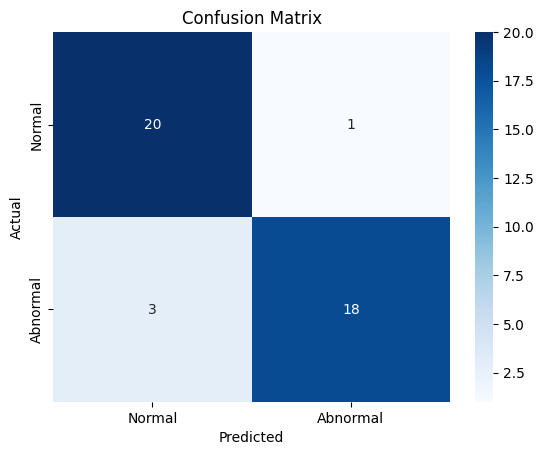

In [44]:
# Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Giải thích LIME cho mẫu được chọn với KNN:
Xác suất dự đoán cho Normal: 40.00%
Xác suất dự đoán cho Abnormal: 60.00%

Đóng góp của các đặc trưng:
pelvic_radius <= -0.33: 0.3352
degree_spondylolisthesis <= -0.69: -0.2423
pelvic_tilt > 0.33: 0.1876
-0.35 < pelvic_incidence <= 0.48: -0.0264
-0.74 < sacral_slope <= -0.15: 0.0136
-0.86 < lumbar_lordosis_angle <= -0.30: -0.0082

Giá trị đặc trưng gốc:
pelvic_incidence: 63.03
pelvic_tilt: 22.55
lumbar_lordosis_angle: 39.61
sacral_slope: 40.48
pelvic_radius: 98.67
degree_spondylolisthesis: -0.25


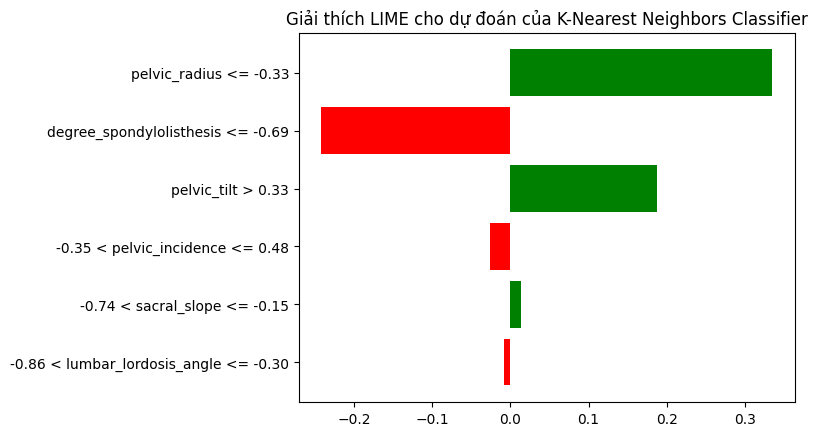

In [46]:
# Train KNN model (using parameters from your original evaluation, if any)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default n_neighbors=5, adjust if needed
knn_model.fit(X_train, y_train)

# Initialize LIME explainer
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns,
    class_names=['Normal', 'Abnormal'],
    discretize_continuous=True
)

# Select sample from Table 5 as in the original code
instance_data = pd.DataFrame({
    'pelvic_incidence': [63.028],
    'pelvic_tilt': [22.55],
    'lumbar_lordosis_angle': [39.61],
    'sacral_slope': [40.48],
    'pelvic_radius': [98.67],
    'degree_spondylolisthesis': [-0.25]
})

# Scale the sample using the same scaler used for training
instance_scaled = scaler.transform(instance_data)

# Explain the sample using LIME with KNN's predict_proba
lime_exp = explainer_lime.explain_instance(
    data_row=instance_scaled[0],
    predict_fn=knn_model.predict_proba,
    num_features=6
)

# Get predicted probabilities directly from predict_proba to avoid IndexError
predicted_probs = knn_model.predict_proba(instance_scaled)[0]

# Display LIME explanation
print("Giải thích LIME cho mẫu được chọn với KNN:")
print(f"Xác suất dự đoán cho Normal: {predicted_probs[0]:.2%}")
print(f"Xác suất dự đoán cho Abnormal: {predicted_probs[1]:.2%}")
print("\nĐóng góp của các đặc trưng:")
for feature, weight in lime_exp.as_list():
    print(f"{feature}: {weight:.4f}")

print("\nGiá trị đặc trưng gốc:")
for feature, value in zip(X.columns, instance_data.iloc[0]):
    print(f"{feature}: {value:.2f}")

# Visualize LIME explanation
fig = lime_exp.as_pyplot_figure()
plt.title("Giải thích LIME cho dự đoán của K-Nearest Neighbors Classifier")
plt.show()